In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from torch import tensor
from torchlightning import *
import pytorch_lightning as pl

/Users/admin/.conda/envs/EE2211/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/admin/.conda/envs/EE2211/lib/python3.10/site-packages/torchvision/image.so, 6): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: /Users/admin/.conda/envs/EE2211/lib/python3.10/site-packages/torchvision/image.so
  Expected in: /Users/admin/.conda/envs/EE2211/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib
 in /Users/admin/.conda/envs/EE2211/lib/python3.10/site-packages/torchvision/image.so
  warn(f"Failed to load image Python extension: {e}")


In [2]:
data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(data["data"], data["target"], test_size=0.5)
train_data = TensorDataset(tensor(x_train, dtype=torch.float32), tensor(y_train, dtype=torch.long))
test_data = TensorDataset(tensor(x_test, dtype=torch.float32), tensor(y_test, dtype=torch.long))
train_loader = DataLoader(train_data, batch_size=1024, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_data, batch_size=1024, pin_memory=True)

model = Network(0.001)
trainer = pl.Trainer(max_epochs=-1, auto_lr_find=True, callbacks=[TrainEarlyStopping(monitor="train loss", mode="min")])
trainer.fit(model, train_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/admin/.conda/envs/EE2211/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
/Users/admin/.conda/envs/EE2211/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(

  | Name    | Type       | Params

Training: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

In [3]:
trainer.test(model=model, dataloaders=test_loader)

/Users/admin/.conda/envs/EE2211/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.9733333587646484     │
│         test loss         │    0.25458818674087524    │
└───────────────────────────┴───────────────────────────┘

[{'test loss': 0.25458818674087524, 'accuracy': 0.9733333587646484}]

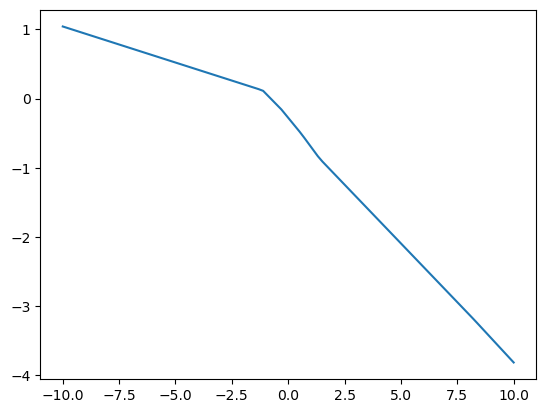

In [4]:
import matplotlib.pyplot as plt
model = Network(0.001)
x = torch.linspace(-10, 10, 100).view(-1, 1)
y = model.encoder(x)
plt.plot(x.detach().numpy(), y.detach().numpy())